In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image,ImageChops

In [2]:
train = pd.read_csv('/Users/kaivuxu/Downloads/mnist_train.csv')
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
rownum=6875

In [4]:
if rownum > -1 and rownum < 60000:
    pixels = train.iloc[rownum][1:].values.reshape(28,28)
    array = np.array(pixels,dtype=np.uint8)
    img = Image.fromarray(array)
else:
    print('wrong')

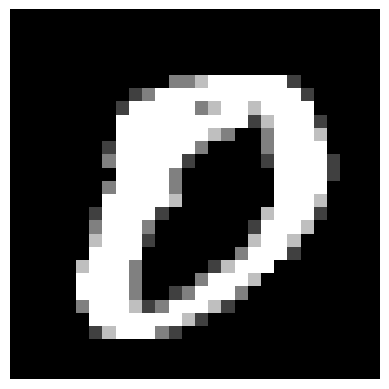

In [5]:
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

In [6]:
gray_img = img.convert('L')

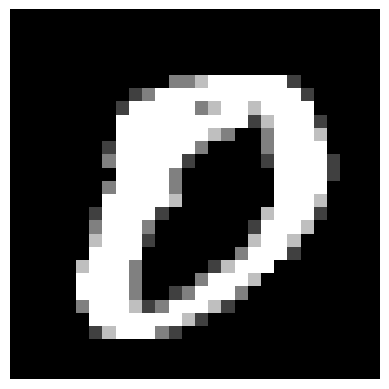

In [7]:
plt.imshow(gray_img,cmap='gray')
plt.axis('off')
plt.show()

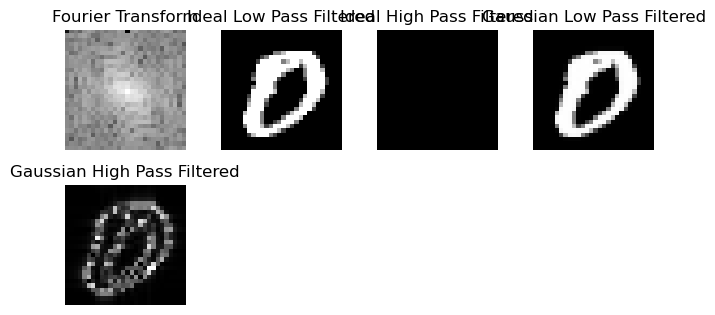

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy import fftpack

# Load and prepare the image

img_array = np.array(gray_img)

# 1. Fourier Transform (Getting the Fourier Transform)
f_transform = fftpack.fft2(img_array)  # Apply 2D Fourier transform
f_transform_shifted = fftpack.fftshift(f_transform)  # Shift the zero frequency component to the center

# Display the Fourier Transformed image (Magnitude Spectrum)
magnitude_spectrum = np.abs(f_transform_shifted)
plt.subplot(3, 4, 1)
plt.imshow(np.log(magnitude_spectrum + 1), cmap='gray')
plt.title("Fourier Transform")
plt.axis('off')

# 2. Ideal Low Pass Filter (Create a low-pass mask)
def ideal_low_pass_filter(shape, radius):
    rows, cols = shape
    center = (rows // 2, cols // 2)
    mask = np.zeros((rows, cols), dtype=np.float32)
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - center[0])**2 + (j - center[1])**2) <= radius:
                mask[i, j] = 1
    return mask

# Create Ideal Low Pass Filter mask
low_pass_filter = ideal_low_pass_filter(img_array.shape, radius=30)

# 3. Multiplying Fourier Transformed image with the low pass filter mask
filtered_low_pass = f_transform_shifted * low_pass_filter

# 4. Inverse Fourier Transform (for Ideal Low Pass Filtering)
img_low_pass = fftpack.ifftshift(filtered_low_pass)  # Inverse shift
img_low_pass = np.abs(fftpack.ifft2(img_low_pass))  # Apply inverse FFT

plt.subplot(3, 4, 2)
plt.imshow(img_low_pass, cmap='gray')
plt.title("Ideal Low Pass Filtered")
plt.axis('off')

# 5. Ideal High Pass Filter (Create a high-pass mask)
def ideal_high_pass_filter(shape, radius):
    return 1 - ideal_low_pass_filter(shape, radius)

# Create Ideal High Pass Filter mask
high_pass_filter = ideal_high_pass_filter(img_array.shape, radius=30)

# 6. Multiplying Fourier Transformed image with the high pass filter mask
filtered_high_pass = f_transform_shifted * high_pass_filter

# 7. Inverse Fourier Transform (for Ideal High Pass Filtering)
img_high_pass = fftpack.ifftshift(filtered_high_pass)  # Inverse shift
img_high_pass = np.abs(fftpack.ifft2(img_high_pass))  # Apply inverse FFT

plt.subplot(3, 4, 3)
plt.imshow(img_high_pass, cmap='gray')
plt.title("Ideal High Pass Filtered")
plt.axis('off')

# 8. Gaussian Low Pass Filter (Create Gaussian mask)
def gaussian_low_pass_filter(shape, cutoff):
    rows, cols = shape
    center = (rows // 2, cols // 2)
    mask = np.zeros((rows, cols), dtype=np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center[0])**2 + (j - center[1])**2)
            mask[i, j] = np.exp(-(distance**2) / (2 * (cutoff**2)))
    return mask

# Create Gaussian Low Pass Filter mask
gaussian_low_pass = gaussian_low_pass_filter(img_array.shape, cutoff=30)

# 9. Multiplying Fourier Transformed image with the Gaussian Low Pass filter mask
filtered_gaussian_low_pass = f_transform_shifted * gaussian_low_pass

# 10. Inverse Fourier Transform (for Gaussian Low Pass Filtering)
img_gaussian_low_pass = fftpack.ifftshift(filtered_gaussian_low_pass)
img_gaussian_low_pass = np.abs(fftpack.ifft2(img_gaussian_low_pass))

plt.subplot(3, 4, 4)
plt.imshow(img_gaussian_low_pass, cmap='gray')
plt.title("Gaussian Low Pass Filtered")
plt.axis('off')

# 11. Gaussian High Pass Filter (Create Gaussian High Pass mask)
def gaussian_high_pass_filter(shape, cutoff):
    return 1 - gaussian_low_pass_filter(shape, cutoff)

# Create Gaussian High Pass Filter mask
gaussian_high_pass = gaussian_high_pass_filter(img_array.shape, cutoff=30)

# 12. Multiplying Fourier Transformed image with the Gaussian High Pass filter mask
filtered_gaussian_high_pass = f_transform_shifted * gaussian_high_pass

# 13. Inverse Fourier Transform (for Gaussian High Pass Filtering)
img_gaussian_high_pass = fftpack.ifftshift(filtered_gaussian_high_pass)
img_gaussian_high_pass = np.abs(fftpack.ifft2(img_gaussian_high_pass))

plt.subplot(3, 4, 5)
plt.imshow(img_gaussian_high_pass, cmap='gray')
plt.title("Gaussian High Pass Filtered")
plt.axis('off')

# Show all results
plt.tight_layout()
plt.show()
